In [ ]:
import pandas as pd

In [101]:
df = pd.read_csv('model_data.csv')

In [104]:
# check for Nan values in the dataset
df.isna().sum()

Place                          0
Year                           0
Season                         0
Relative_humidity              0
Soil_Type                      0
Surface_net_solar_radiation    0
Temperature                    0
Total_precipitation            0
Production                     0
dtype: int64

In [103]:
# drop the rows where Production is NaN
df = df.dropna(subset=['Production'])

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df["Soil_Type"].value_counts()

In [ ]:
df.head()

In [105]:
# drop place column
df = df.drop("Place", axis=1)

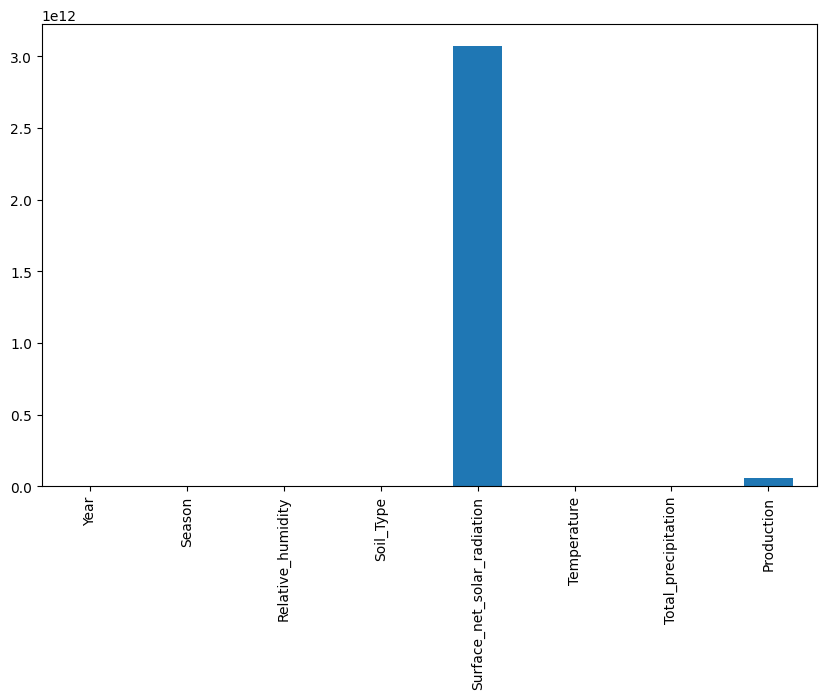

In [127]:
# plot the variance of the features
import matplotlib.pyplot as plt

df.var().plot(kind="bar", figsize=(10, 6))

plt.show()


In [124]:
print(type(predictions))

<class 'numpy.ndarray'>


Epoch 1/10


C:\Users\Ashish Singh\AppData\Local\Temp\ipykernel_1080\1108012686.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Relative_humidity', 'Surface_net_solar_radiation', 'Temperature', 'Total_precipitation']] = scaler.fit_transform(X[['Relative_humidity', 'Surface_net_solar_radiation', 'Temperature', 'Total_precipitation']])


149/149 [==============================] - 1s 2ms/step - loss: 62738677760.0000 - val_loss: 64617017344.0000
Epoch 2/10
149/149 [==============================] - 0s 2ms/step - loss: 62720946176.0000 - val_loss: 64578138112.0000
Epoch 3/10
149/149 [==============================] - 0s 2ms/step - loss: 62646779904.0000 - val_loss: 64463118336.0000
Epoch 4/10
149/149 [==============================] - 0s 2ms/step - loss: 62478303232.0000 - val_loss: 64234086400.0000
Epoch 5/10
149/149 [==============================] - 0s 1ms/step - loss: 62187671552.0000 - val_loss: 63874596864.0000
Epoch 6/10
149/149 [==============================] - 0s 1ms/step - loss: 61783859200.0000 - val_loss: 63417446400.0000
Epoch 7/10
149/149 [==============================] - 0s 2ms/step - loss: 61272539136.0000 - val_loss: 62849998848.0000
Epoch 8/10
149/149 [==============================] - 0s 2ms/step - loss: 60659970048.0000 - val_loss: 62214393856.0000
Epoch 9/10
149/149 [==============================]

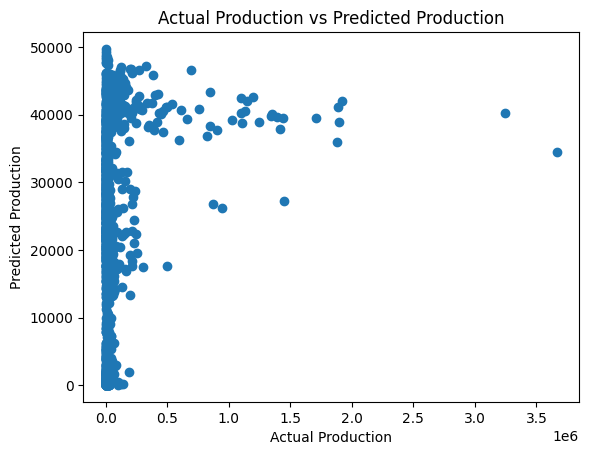

In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Embedding
from tensorflow.keras.utils import to_categorical

# Preprocess the data
label_encoder = LabelEncoder()
df['Season'] = label_encoder.fit_transform(df['Season'])
df['Soil_Type'] = label_encoder.fit_transform(df['Soil_Type'])

# Separate features and target variable
X = df[['Relative_humidity', 'Surface_net_solar_radiation', 'Temperature', 'Total_precipitation', 'Soil_Type', 'Season']]
y = df['Production']

# Standardize numerical features
scaler = StandardScaler()
X[['Relative_humidity', 'Surface_net_solar_radiation', 'Temperature', 'Total_precipitation']] = scaler.fit_transform(X[['Relative_humidity', 'Surface_net_solar_radiation', 'Temperature', 'Total_precipitation']])

# Convert categorical features to one-hot encoding
X = pd.get_dummies(X, columns=['Soil_Type', 'Season'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


# Build the CNN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {loss}")

# Make predictions
predictions = model.predict(X_test)

# make predictions data type as y_test
predictions = predictions.flatten()

# Calculate the RMSE score
rmse = np.sqrt(loss)
print(f"RMSE: {rmse}")

# Calculate the MAPE score
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"MAPE: {mape}%")

# plot the predictions and actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual Production vs Predicted Production')
plt.show()

